# 情報活用講座：　SHAP編

## SHAP（SHapley Additive exPlanations）

SHAPは機械学習モデルの予測を解釈し、個々の特徴量が予測にどの程度寄与しているかを評価するための手法の一つです。SHAP値はゲーム理論において協力によって得られた利得をプレイヤーに分配するアルゴリズムです。このアルゴリズを機械学習分野へ転用することで、特徴量の寄与度を公平かつ一貫性のある方法で評価することができ、説明が可能なAI(XAI）を提供します。

<img src="./img/shap_header.svg" width="70%">

SHAPの主要な概念と要点は以下の通りです：

1. シャプリー値（Shapley Values）: シャプリー値はゲーム理論から派生した概念で、特徴量が予測にどれだけ寄与するかを評価するために使用されます。シャプリー値は、特徴量の組み合わせごとに計算され、その特徴量がどれだけ貢献したかを示します。このアプローチは、特徴量の寄与を公平に評価するために使用され、全ての特徴量が協力して予測に寄与する場合に特に役立ちます。

2. 予測の解釈: SHAPを使用することで、モデルの予測がどの特徴量にどの程度依存しているかを可視化できます。これにより、モデルの予測が理解しやすくなり、特徴量の重要性を定量化できます。

3. Tree SHAP: SHAP値の計算は、特にツリーベースのモデル（例: ランダムフォレスト、勾配ブースティングなど）に対して効率的に行うためのアルゴリズムがあります。Tree SHAPアルゴリズムは、特徴量の組み合わせを効率的に評価し、SHAP値を計算します。

4. モデルの説明性の向上: SHAPは、モデルの予測をより解釈可能にし、モデルの予測が不正確な場合やバイアスがある場合にその原因を特定するのに役立ちます。また、特徴量の寄与を評価することで、モデルの改善や特徴量の選択に関する意思決定を支援します。


## データセット
"California Housing" は、アメリカ・カリフォルニア州の住宅価格に関するデータを収集したデータセットです。このデータセットは、機械学習やデータ分析の教育や研究でよく使用され、住宅価格を予測するためのモデルを構築する際に役立ちます。

California Housingデータセットには、住宅価格を予測するための9種類の特徴量があります。

1. **MedInc**: 地域内の家計の収入（中央値）。  世帯収入の指標となります。
1. **HouseAge** : 地域内の住宅の築年数（中央値）。住宅がどれくらい古いかを示す指標です。
1. **AveRooms**: 平均部屋数。地域内の住宅の平均部屋数を示しています。
1. **AveBedrms**: 平均寝室数。地域内の住宅の平均寝室数を示しています。
1. **Population**: 地域内の総人口。
1. **AveOccup**: 平均住戸数。地域内の住宅の平均住戸数を示しています。
1. **Latitude**: 地域内の緯度。
1. **Longitude**: 地域の経度。
1. **MedHouseVal**: 地域内の住宅価格の中央値。機械学習では目的変数として、これを予測するこ一般的なタスクです。

# 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（Google colabに接続しない場合には不要）

In [ ]:
!pip install xgboost
!pip install shap
!git clone https://github.com/ARIM-Training/Training_python_12.git
%cd Training_python_12

### ライブラリのインポート

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 警告を無視
from warnings import filterwarnings
filterwarnings('ignore')

### サンプルファイルの読み込み
shapライブラリにセットされている"California Housing" データセットを読み込みます。サンプル数（標本数）は20640であることが確認できます。

In [10]:
X, y = shap.datasets.california()

In [11]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### SHAPのによる特徴量の評価・可視化方法の流れ

#### shapライブラリについて： https://github.com/shap/shap   
Shapライブラリは、機械学習モデルの解釈性を向上させるためのSHAP計算や、その評価を行うことができるツール群です。ツリーアンサンブル法（例: ランダムフォレスト、勾配ブースティングなど）の視点から個々の予測を解釈し、各特徴量の寄与を示すForce PlotやSummary Plotなどの可視化ツールを提供します。

`shap` を使用する一般的な手順は次の通りです:

1. **モデル構築**：　scikit-learnなどを用いて機械学習モデル（ＭＬモデル）を構築します。
2. **Explainerの設定**：　ＭＬモデルとデータを `shap.Explainer()` に渡します。
3. **SHAP値の計算**：　`Explainer` オブジェクトを使用して SHAP 値（shap_values）を計算します。
4. **評価（可視化）**：　その後にbeeswarm plotやforce plotで可視化します。

### 1. モデル構築（XGboost）
MLモデルでは、XGBoost（Extreme Gradient Boosting）で評価する例で進めてゆきます。XGBoostは、機械学習モデルの一つで、勾配ブースティングアルゴリズムを基にした強力なアンサンブル学習手法で高い性能と汎化能力を持つことで知られ、様々なデータ科学のタスクで広く使用されています。

XGBoostに特化したxgboostライブラリを読み込みますが、その後のインスタンス化やモデルFitの流れはScikit-learnの手続きとかわりません。

In [12]:
import xgboost

In [13]:
model = xgboost.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 2. Explainerの設定

In [15]:
import shap
exp = shap.Explainer(model)

【解説】　**Explainer** について   
Explainer()は、SHAPライブラリ内の主要なクラスの一つです。このクラスは、機械学習モデルの解釈性を向上させるために使用され、モデルの予測を説明するために SHAP 値を計算する役割を果たします。

以下に、`shap.Explainer()` の主要な概念と使い方を説明します。

```
explainer = shap.Explainer(model, data=None, **kwargs)
``` 
のように初期化されます。

主なパラメータと引数:

1. `model`: SHAP 値を計算するための機械学習モデルです。このモデルは、Python の機械学習ライブラリ（例: scikit-learn、XGBoost、LightGBM）でトレーニングされたものである必要があります。

2. `data` (オプション): データセットを指定します。このデータセットは、モデルのトレーニング時と同じ特徴量を持つ必要があります。データを指定することで、SHAP 値を計算する際に参照されます。指定しない場合、`model` の特徴量が使用されます。

3. `**kwargs` (オプション): Explainer クラスの初期化に関する他のオプションやパラメータを指定します。具体的なオプションはライブラリのバージョンによって異なることがあります。


### 3. SHAP値の計算
Explainerにデータ（ここでは教師データX）を渡します。

In [16]:
shap_values = exp(X)

### 4. 可視化と評価
### 4.1 bar plot
各特徴のSHAP値の平均絶対値を取るだけで、標準棒グラフが得られます（マルチクラス出力では積み重ね棒グラフが得られます）。
バープロットではバーの高さが特徴量の重要性を示し、高いバーは予測に対して重要な特徴量を示します。

### Global bar plot

SHAP値のマトリックスを`plots.bar()`関数に渡すと、大域的な特徴量の重要度プロットが作成されます。各特徴の大域的な重要度は、与えられたすべてのサンプルにわたるその特徴量の平均絶対値とみなされます。

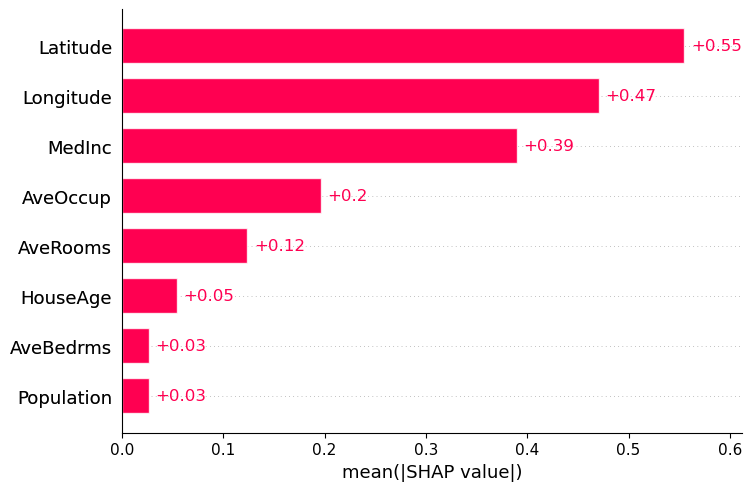

In [17]:
shap.plots.bar(shap_values)

デフォルトでは、棒グラフは10本表示されますが、表示数は`max_display`パラメータで制御できます。

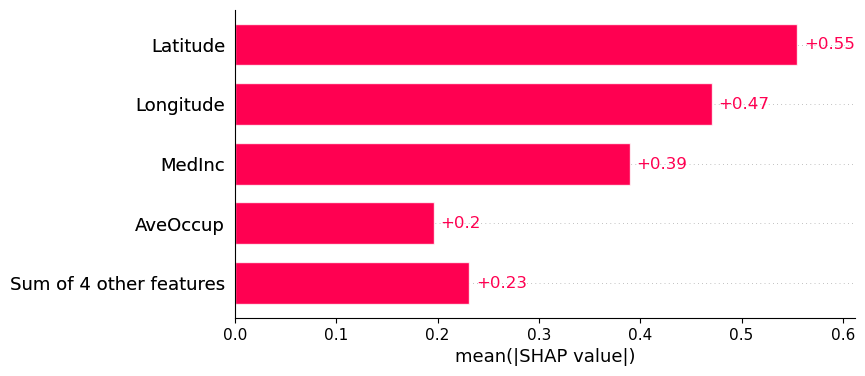

In [18]:
shap.plots.bar(shap_values, 
               max_display=5
              )

### Local bar plot

各インスタンス（サンプル）のSHAP値を`plots.bar()`関数に渡すと、各特徴量のSHAP値を棒グラフにしたサンプルごとの特徴量の重要度プロットが作成されます。なお、特徴量の値は特徴量名の左側にグレーで表示されます。

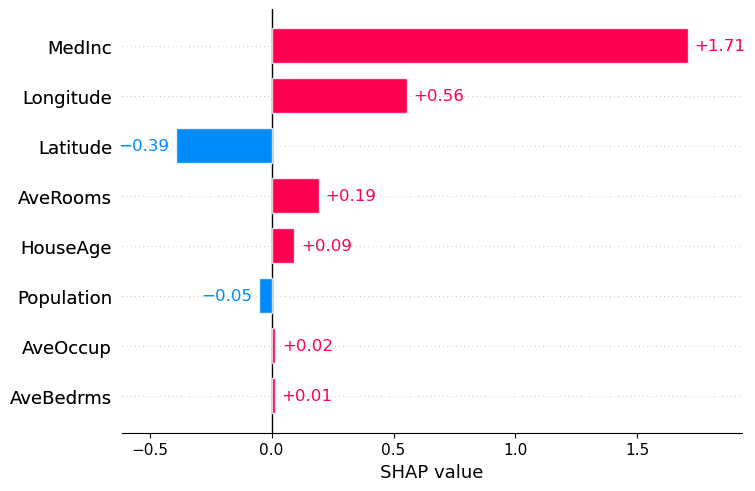

In [21]:
#　最初のインスタンス（サンプル）のSHAP値
shap.plots.bar(shap_values[0])

### 4.2 beeswarm plot

ビースワームプロットでは、各特徴量のSHAP値が水平に散布され、各点はデータセット内の特定のデータポイントを表します。プロット内の点の分布は、特徴量のSHAP値の分布を示し、各特徴量が予測にどの程度影響を与えているかを示します。

shapの可視化法では、最もポピュラーな表現図です。

### simple beeswarm summary plot
下のプロットは、全サンプルのSHAP値の大きさの合計で特徴をソートし、SHAP値を使って各特徴がモデル出力に与える影響の分布を示します。
色は特徴値を表しています（赤が高く、青が低い）。これにより、例えば世帯所得（MedInc）が高いほど住宅価格（予測値）は高まることがわかります。

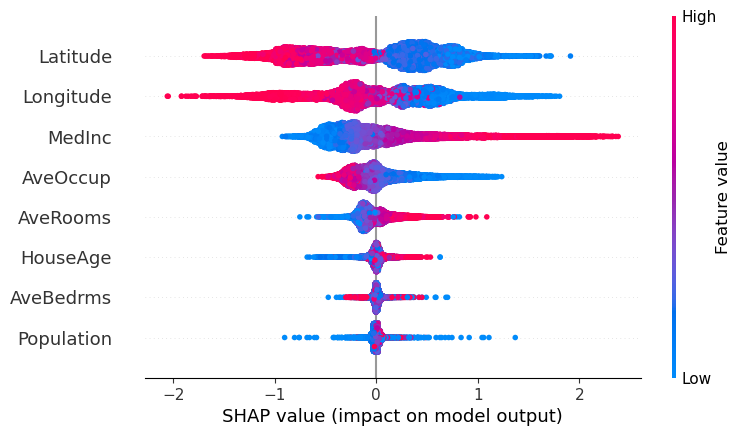

In [27]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

### Feature ordering

デフォルトでは、各特徴量の SHAP 値の絶対値の平均値である shap_values.abs.mean(0) を用いて並べています。しかし、この順序は大まかな平均のImpactが重視されるため、稀ではありますが、大きなImpact影響が重視れないことがあります。このようなとき、代わりに絶対値の最大値でソートすることができます。

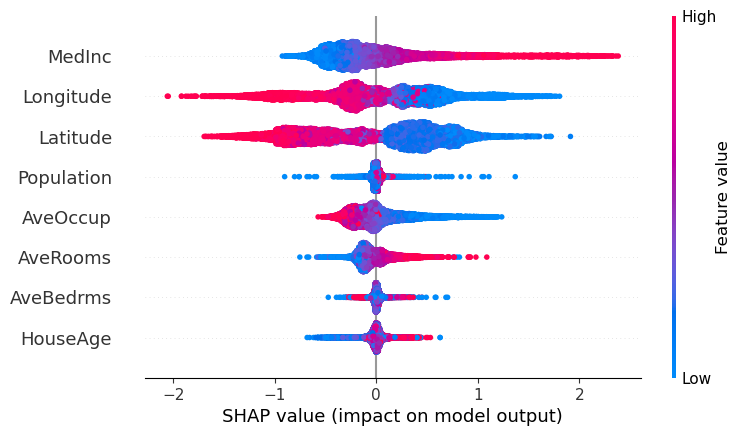

In [28]:
shap.plots.beeswarm(shap_values, 
                    order = shap_values.abs.max(0)
                   )

### 色のカスタマイズ化

デフォルトでは、beeswarmはshap.plots.colors.red_blueカラーマップを使用しますが、colorパラメータを使用して任意のmatplotlibカラーまたはカラーマップに変更することができます。

【matplotlibのカラーマップ】　https://matplotlib.org/stable/users/explain/colors/colormaps.html

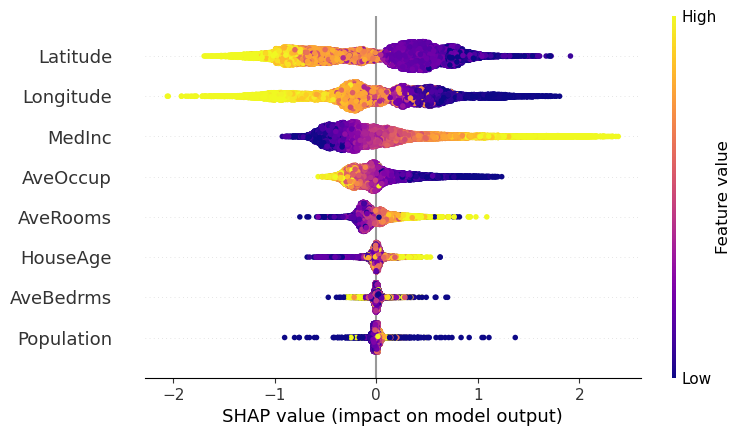

In [29]:
shap.plots.beeswarm(shap_values, 
                    color=plt.get_cmap("plasma")
                   )

### 4.3 waterfall plot
waterfallプロットは、モデルの予測を理解し、個々のデータポイントに対する予測の詳細を調査するのに役立ちます。特に、どの特徴量が特定の予測にどの程度影響を与えているかを視覚的に理解できます。

各特徴が基本値（渡したトレーニングデータセットの平均モデル出力）からモデル出力を押し上げるのに貢献していることを示しています。  予測値を押し上げる特徴量は赤で、予測値を押し下げる特徴量は青で示されています。 プロットの下部には、全体の予測（E[f(x)]）と各特徴量の寄与の合計が表示されます。

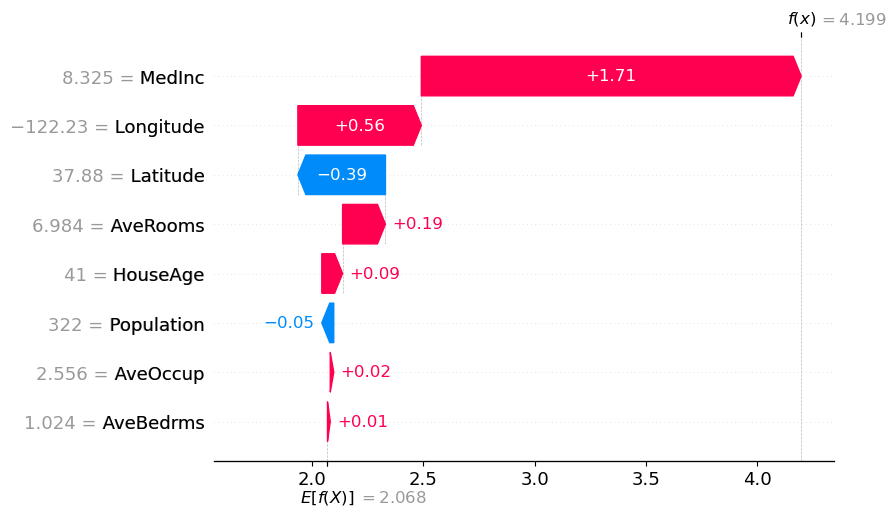

In [30]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

### 4.4 force plot
同じ説明を視覚化する別の方法としては、force plotを使うことができます。Force プロットは、特定のデータポイントに対する予測を詳細に解釈するための寄与度を視覚化します。  

プロット内には以下の情報が含まれます：

* Base Value: 予測の基本値（通常の予測の平均値）。
* Output Value: 特定のデータポイントの予測値。
* Feature Contributions: 各特徴量が予測に対してどの程度寄与しているか。
* Expected Value: 特定のデータポイントにおける特徴量の寄与の合計。与の合計。

In [31]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

上図のフォース・プロットをたくさん取り出して90度回転させ、水平に積み重ねると、データセット全体の説明を見ることができます。下記は500番目までのサンプル（インスタンス）を縦に並べた表示例です。
（JupyterNotebookでは、このプロットはインタラクティブになっています）

In [32]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values[:500])

### 4.5 scatter plot
Scatter プロットでは、2つの特徴量に関連するSHAP値が表示されます。各点はデータセット内の特定のデータポイントを表し、x軸とy軸にはそれぞれ異なる特徴量のSHAP値が表示されます。プロット内の各点は、特定のデータポイントの予測に対する2つの特徴量の寄与を示します。点の位置が x 軸上で右に寄っている場合、その特徴量は予測を増加させる方向に寄与し、左に寄っている場合は予測を減少させる方向に寄与します。

SHAP値はモデル出力の変化に対する特徴量の寄与を表すので、下のプロットは、緯度の変化に伴う住宅価格の予測値の変化を表しています。

緯度（Latitude）の1つの値での垂直方向の分散は、他の特徴との相互作用効果を表します。これらの相互作用を明らかにするのを助けるために、別の特徴で色を付けることができます。
説明テンソル全体をcolor引数に渡すと、散布図は色付けするのに最適な特徴を選びますが、この場合は経度を選んでいます。

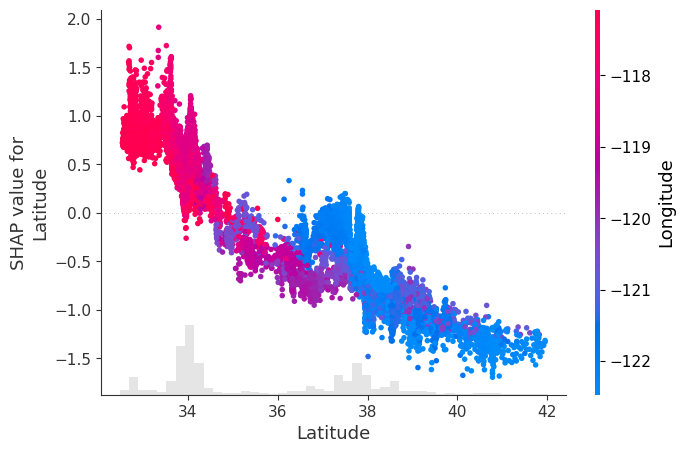

In [20]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset

shap.plots.scatter(shap_values[:, "Latitude"], 
                   color=shap_values
                  )